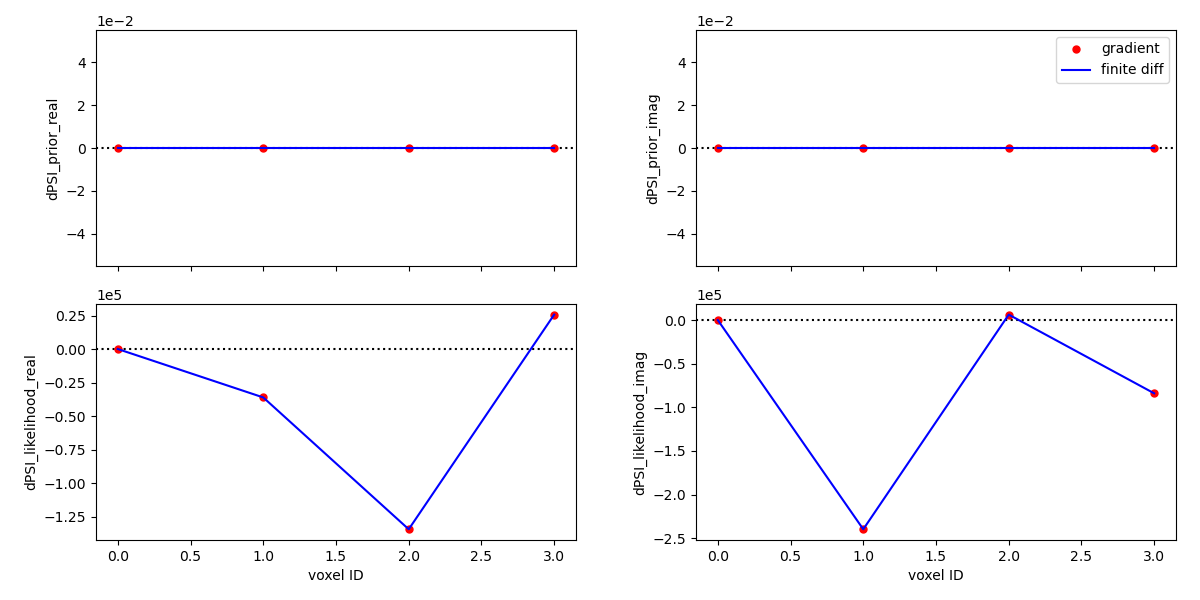

In [3]:
from PIL import Image                                                                               
img = Image.open('../check_gradient.png')
img.show() 

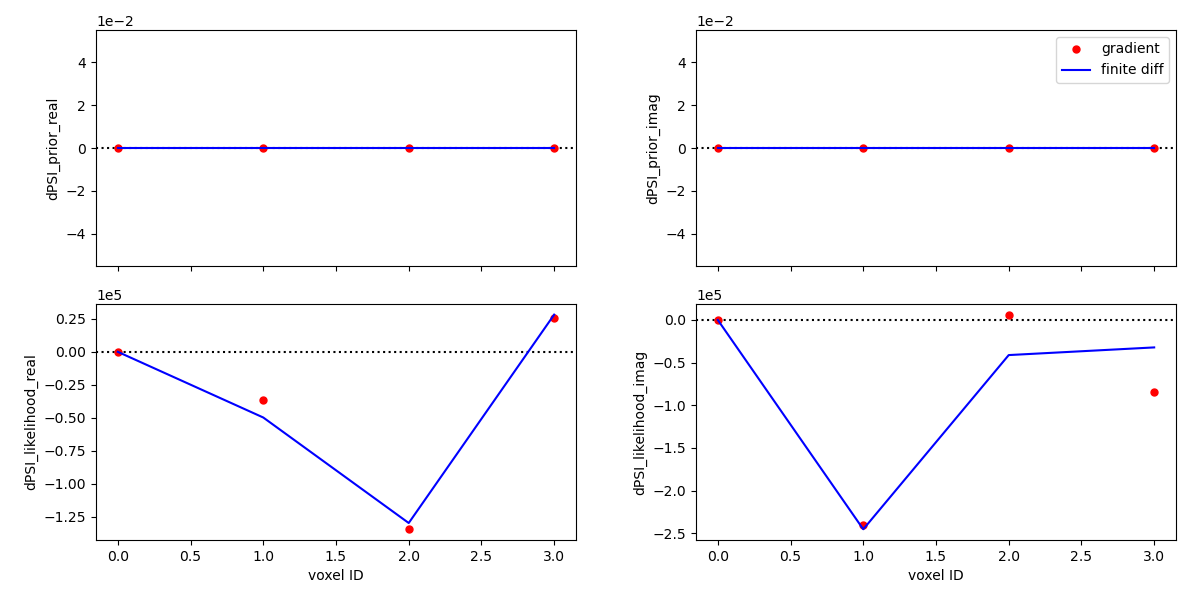

In [4]:
from PIL import Image                                                                               
img = Image.open('../check_gradient.png')
img.show() 

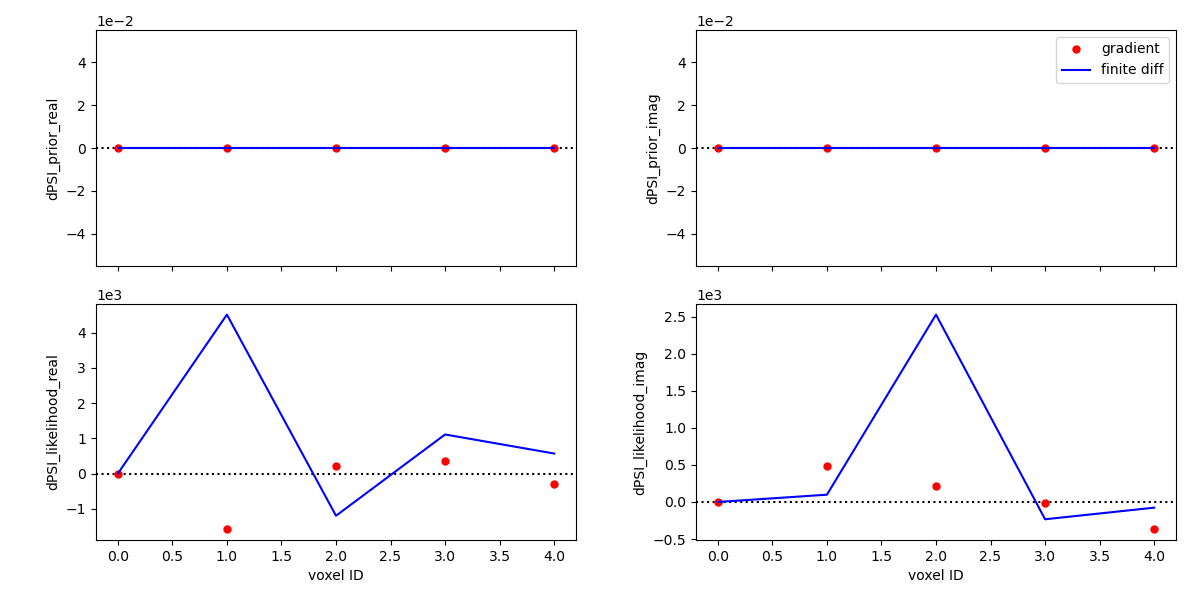

In [15]:
from PIL import Image                                                                               
img = Image.open('../check_gradient.png')
img.show() 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
q = np.load('../data/q_initial_L128N250.npy')


In [4]:
print(a[np.where(a<-5)])
print(a[np.where(a>200)])

[-249.99807912 -249.99681909 -249.99681909 -249.99619981]
[249.99744603 249.99744603 249.99744603 249.99807912 249.99871683
 249.99935764 249.99935764]


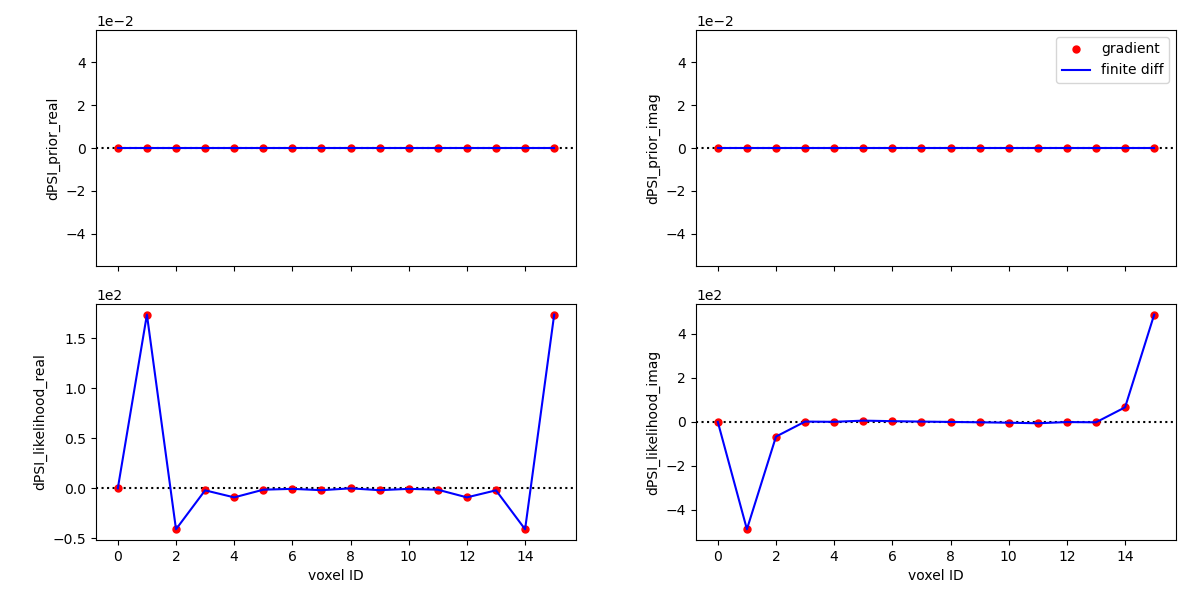

In [13]:
from PIL import Image                                                                                
img = Image.open('../check_gradient.png')
img.show() 

In [16]:
import h5py
import numpy as np

with h5py.File('../dump.h5', 'r') as f:
    lh = f['scalars/gradient_array_lh']
    print(np.array(lh))

#lh = f.scalars.gradient_array_lh[::ss,:,:].flatten('F')

[[[ 0.+0.j -0.-0.j -0.-0.j ... -0.-0.j -0.-0.j -0.-0.j]
  [-0.-0.j -0.-0.j -0.-0.j ... -0.-0.j -0.-0.j -0.-0.j]
  [-0.-0.j -0.-0.j -0.-0.j ... -0.-0.j -0.-0.j -0.-0.j]
  ...
  [-0.-0.j -0.-0.j -0.-0.j ... -0.-0.j -0.-0.j -0.-0.j]
  [-0.-0.j -0.-0.j -0.-0.j ... -0.-0.j -0.-0.j -0.-0.j]
  [-0.-0.j -0.-0.j -0.-0.j ... -0.-0.j -0.-0.j -0.-0.j]]

 [[-0.-0.j -0.-0.j -0.-0.j ... -0.-0.j -0.-0.j -0.-0.j]
  [-0.-0.j -0.-0.j -0.-0.j ... -0.-0.j -0.-0.j -0.-0.j]
  [-0.-0.j -0.-0.j -0.-0.j ... -0.-0.j -0.-0.j -0.-0.j]
  ...
  [-0.-0.j -0.-0.j -0.-0.j ... -0.-0.j -0.-0.j -0.-0.j]
  [-0.-0.j -0.-0.j -0.-0.j ... -0.-0.j -0.-0.j -0.-0.j]
  [-0.-0.j -0.-0.j -0.-0.j ... -0.-0.j -0.-0.j -0.-0.j]]

 [[-0.-0.j -0.-0.j -0.-0.j ... -0.-0.j -0.-0.j -0.-0.j]
  [-0.-0.j -0.-0.j -0.-0.j ... -0.-0.j -0.-0.j -0.-0.j]
  [-0.-0.j -0.-0.j -0.-0.j ... -0.-0.j -0.-0.j -0.-0.j]
  ...
  [-0.-0.j -0.-0.j -0.-0.j ... -0.-0.j -0.-0.j -0.-0.j]
  [-0.-0.j -0.-0.j -0.-0.j ... -0.-0.j -0.-0.j -0.-0.j]
  [-0.-0.j -0.-0.j -0.-0.j

In [17]:
f.close()

In [7]:
import numpy as np
a = np.random.random((128,128,128))
print(a[:2,:2,:2])
print(a.T[:2,:2,:2])

[[[0.73935318 0.16381925]
  [0.51414981 0.06927072]]

 [[0.47991606 0.92026952]
  [0.22705987 0.69401111]]]
[[[0.73935318 0.47991606]
  [0.51414981 0.22705987]]

 [[0.16381925 0.92026952]
  [0.06927072 0.69401111]]]


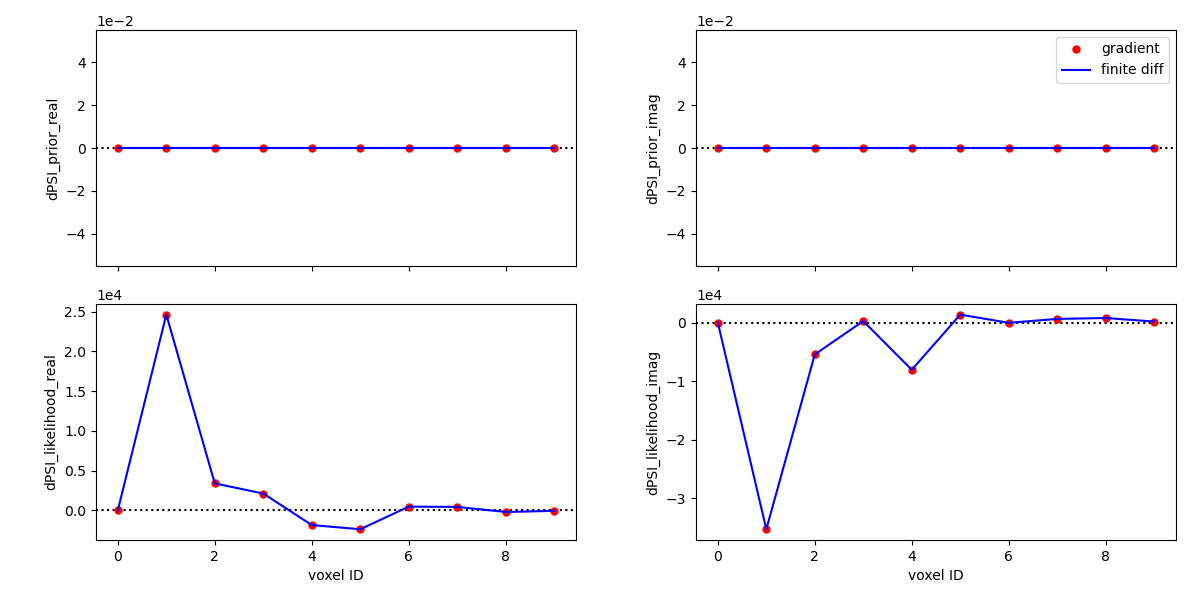

In [8]:
from PIL import Image                                                                                
img = Image.open('check_gradientLPTL250N128.png')
img.show() 

## Compare float32 and float64

Reading from ../dump_LPTEMU32
Reading from ../dump_LPTEMU64


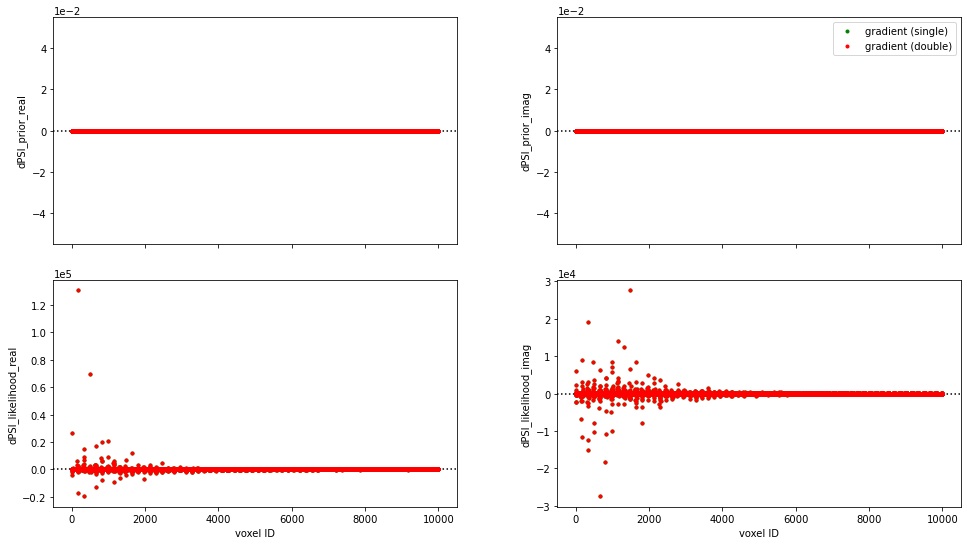

In [81]:
#+
#   ARES/HADES/BORG Package -- ./scripts/check_gradients.py
#   Copyright (C) 2014-2022 Guilhem Lavaux <guilhem.lavaux@iap.fr>
#   Copyright (C) 2009-2022 Jens Jasche <jens.jasche@fysik.su.se>
#
#   Additional contributions from:
#      Fabian Schmidt <fabians@mpa-garching.mpg.de> (2021)
#      Guilhem Lavaux <guilhem.lavaux@iap.fr> (2016-2021)
#      Jens Jasche <j.jasche@tum.de> (2016-2017)
#      elsner <f.elsner@mpa-garching.mpg.de> (2017)
#
#+
import matplotlib
matplotlib.use('Agg')
import sys
sys.path.append('/cfs/home/ludo4644/WienerFilter/Aquila/ares/scripts/')
from ares_tools import read_all_h5
import pylab as plt
from sys import argv
import argparse
%matplotlib inline


fig = plt.figure(figsize=(14, 8))
fig.subplots_adjust(left=0.08, right=0.98, bottom=0.1, top=0.95, wspace=0.25, hspace=0.16)

files=['../dump_LPTEMU32','../dump_LPTEMU64']
colors=['r','g']

adj_float32 = []
adj_float64 = []
fd_float64 = []

for file,c in zip(files,colors): 
    print('Reading from %s' % file)
    g=read_all_h5(file)
    
    #'F' order so can compare using itertools.product(*map(range, [4,1,1 // 2 + 1])) in run_gradient_test.py
    prior = g.scalars.gradient_array_prior[::ss,:,:].flatten('F') 
    prior_ref = g.scalars.gradient_array_prior[::ss,:,:].flatten('F')

    dpr_adj_re= prior.real
    dpr_ref_re= prior_ref.real
    dpr_adj_im= prior.imag
    dpr_ref_im= prior_ref.imag

    lh = g.scalars.gradient_array_lh[::ss,:,:].flatten('F')
    lh_ref = g.scalars.gradient_array_lh_ref[::ss,:,:].flatten('F')

    dlh_adj_re= lh.real
    dlh_ref_re= 1*lh_ref.real
    dlh_adj_im= lh.imag
    dlh_ref_im= 1*lh_ref.imag

    if file[-2:] == '32':
        adj_float32.append(dpr_adj_re)
        adj_float32.append(dpr_adj_im)
        adj_float32.append(dlh_adj_re)
        adj_float32.append(dlh_adj_im)
    else:
        adj_float64.append(dpr_adj_re)
        adj_float64.append(dpr_adj_im)
        adj_float64.append(dlh_adj_re)
        adj_float64.append(dlh_adj_im)
        
        fd_float64.append(dpr_ref_re)
        fd_float64.append(dpr_ref_im)
        fd_float64.append(dlh_ref_re)
        fd_float64.append(dlh_ref_im)


ms = 3
with_fd = False
#ss=16
#step=10
ss=1#8*8

if with_fd:
    step=1
    maxs = 10
    only_numerical = True
else:
    step=100
    maxs=1000000
    only_analytical = True
    only_numerical = False
    
ax1=plt.subplot(2,2,1)             # left subplot in top row
plt.axhline(0.0, color='black', linestyle=':')
if only_analytical:
    plt.plot(adj_float32[0][:maxs][::step],'go',markersize=ms)
    plt.plot(adj_float64[0][:maxs][::step],'ro',markersize=ms)
if only_numerical:
    plt.plot(fd_float64[0][:maxs][::step],color='blue')
ax1.yaxis.get_major_formatter().set_powerlimits((-2, 2))
ax1.xaxis.set_ticklabels('')
plt.ylabel('dPSI_prior_real')

labels=['gradient (single)','gradient (double)','finite diff (double)']

ax2=plt.subplot(2,2,2)             # right subplot in top row
plt.axhline(0.0, color='black', linestyle=':')
arts=[]
if only_analytical:
    arts.append(plt.plot(adj_float32[1][:maxs][::step],'go',markersize=ms)[0])
    arts.append(plt.plot(adj_float64[1][:maxs][::step],'ro',markersize=ms)[0])
if only_numerical:
    arts.append(plt.plot(fd_float64[1][:maxs][::step],color='blue')[0])
ax2.legend(arts,labels)
ax2.yaxis.get_major_formatter().set_powerlimits((-2, 2))
ax2.xaxis.set_ticklabels('')
plt.ylabel('dPSI_prior_imag')

ax3=plt.subplot(2,2,3)             # left subplot in bottom row
plt.axhline(0.0, color='black', linestyle=':')
if only_analytical:
    plt.plot(adj_float32[2][:maxs][::step],'go',markersize=ms)
    plt.plot(adj_float64[2][:maxs][::step],'ro',markersize=ms)
if only_numerical:
    plt.plot(fd_float64[2][:maxs][::step],color='blue')
ax3.yaxis.get_major_formatter().set_powerlimits((-2, 2))
plt.xlabel('voxel ID')
plt.ylabel('dPSI_likelihood_real')

ax4=plt.subplot(2,2,4)             # right subplot in bottom row
plt.axhline(0.0, color='black', linestyle=':')
if only_analytical:
    plt.plot(adj_float32[3][:maxs][::step],'go',markersize=ms)
    plt.plot(adj_float64[3][:maxs][::step],'ro',markersize=ms)
if only_numerical:
    plt.plot(fd_float64[3][:maxs][::step],color='blue')
ax4.yaxis.get_major_formatter().set_powerlimits((-2, 2))
plt.xlabel('voxel ID')
plt.ylabel('dPSI_likelihood_imag')

plt.show()

/cfs/home/ludo4644/.local-co/envs/BORG/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/cfs/home/ludo4644/.local-co/envs/BORG/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


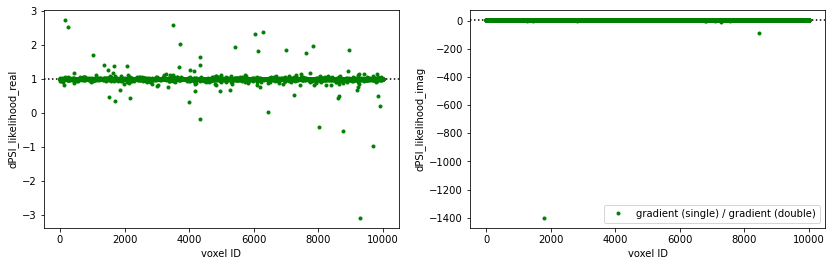

In [82]:
fig = plt.figure(figsize=(14, 4))
"""
ax1=plt.subplot(2,2,1)             # left subplot in top row
plt.axhline(0.0, color='black', linestyle=':')
plt.plot(adj_float32[0][:maxs][::step]/adj_float64[0][:maxs][::step],'ko',markersize=ms)
ax1.yaxis.get_major_formatter().set_powerlimits((-2, 2))
ax1.xaxis.set_ticklabels('')
plt.ylabel('dPSI_prior_real')

labels=[]
labels.append('gradient')

ax2=plt.subplot(2,2,2)             # right subplot in top row
plt.axhline(0.0, color='black', linestyle=':')
arts=[]
arts.append(plt.plot(adj_float32[1][:maxs][::step]/adj_float64[1][:maxs][::step],'ko',markersize=ms)[0])
ax2.legend(arts,labels)
ax2.yaxis.get_major_formatter().set_powerlimits((-2, 2))
ax2.xaxis.set_ticklabels('')
plt.ylabel('dPSI_prior_imag')
"""

ax3=plt.subplot(1,2,1)             # left subplot in bottom row
plt.axhline(1.0, color='black', linestyle=':')
plt.plot(adj_float32[2][:maxs][::step]/adj_float64[2][:maxs][::step],'go',markersize=ms)
if only_numerical:
    plt.plot(fd_float64[2][:maxs][::step]/adj_float64[2][:maxs][::step],'bo',markersize=ms)
#ax3.yaxis.get_major_formatter().set_powerlimits((-2, 2))
plt.xlabel('voxel ID')
plt.ylabel('dPSI_likelihood_real')

ax4=plt.subplot(1,2,2)             # right subplot in bottom row
plt.axhline(1.0, color='black', linestyle=':')
plt.plot(adj_float32[3][:maxs][::step]/adj_float64[3][:maxs][::step],'go',markersize=ms,label='gradient (single) / gradient (double)')
if only_numerical:
    plt.plot(fd_float64[3][:maxs][::step]/adj_float64[3][:maxs][::step],'bo',markersize=ms,label='fininte diff (double) / gradient (double)')
#ax4.yaxis.get_major_formatter().set_powerlimits((-2, 2))
plt.xlabel('voxel ID')
plt.ylabel('dPSI_likelihood_imag')
plt.legend()
plt.show()